<a href="https://colab.research.google.com/github/ailunguo/Test/blob/main/Opencv_Test/Image_Processing_in_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [2]:
region_img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg')

In [3]:
img = region_img.copy()

# 改变颜色空间

In [ ]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(len(flags))

346


In [ ]:
# Note HSV的色调范围(hue range)为[0, 179],
# 饱和度范围(saturation range)为[0, 255]
# 值得范围为[0, 255]

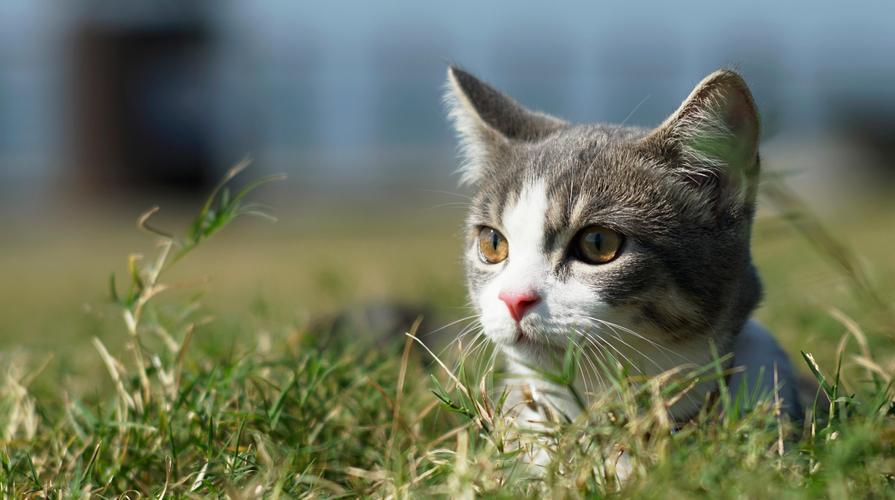

In [ ]:
cv2_imshow(img)

提取蓝色对象

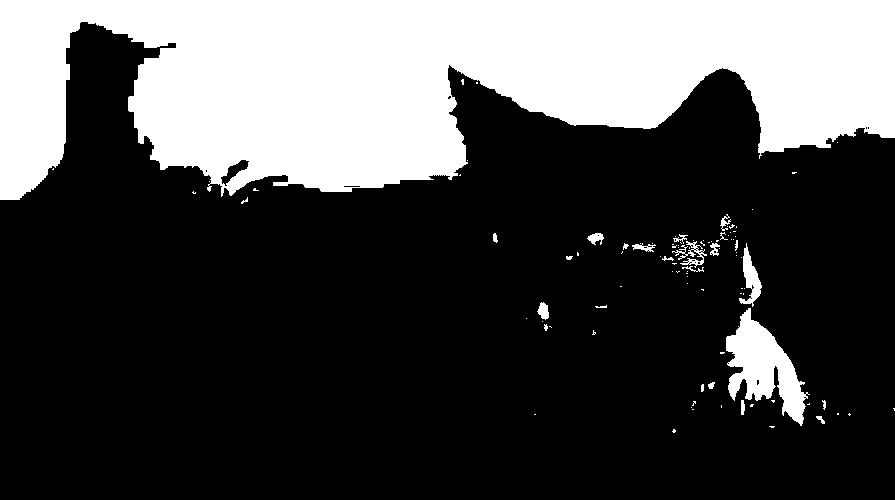

In [ ]:
# 将图像转换为HSV颜色空间
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# 定义在HSV中得蓝色范围
lower_blue = np.array([60, 20, 20])
upper_blue = np.array([130, 255, 255])

# 对HSV图像设置阙值仅得到蓝色
mask = cv.inRange(hsv, lower_blue, upper_blue)
# 在这个范围的->255, 不在的->0

# 用Bitwise-AND对原始图像进行提取
res = cv.bitwise_and(img, img, mask=mask)
cv2_imshow(mask)

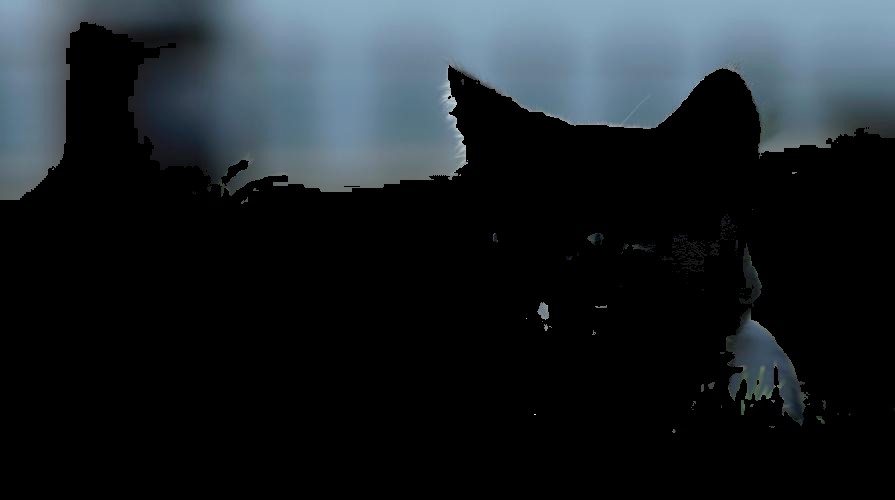

In [ ]:
cv2_imshow(res)

查找想要跟踪的颜色的HSV的值

In [ ]:
# 查找蓝色的HSV的值
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)
# 分别将 [H-10, 100,100] 和 [H+10, 255, 255] 作为下限和上限

[[[ 60 255 255]]]


# 图像的几何变换

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

region_img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg')
img = region_img.copy()

缩放

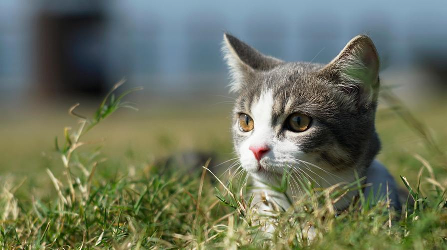

In [12]:
res1 = cv.resize(img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)
# fx, fy分别是水平和垂直放大因子，<1 -->缩小
# OR
height, width = img.shape[:2]
res = cv.resize(img, (width//2, height//2), interpolation=cv.INTER_CUBIC)
# (width//2, height//2)这个数组内的值必须是整数倍
cv2_imshow(res)

转换

In [14]:
# 读取灰色图像
region_img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg', cv.IMREAD_GRAYSCALE)
img = region_img.copy()

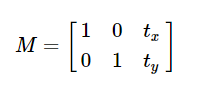

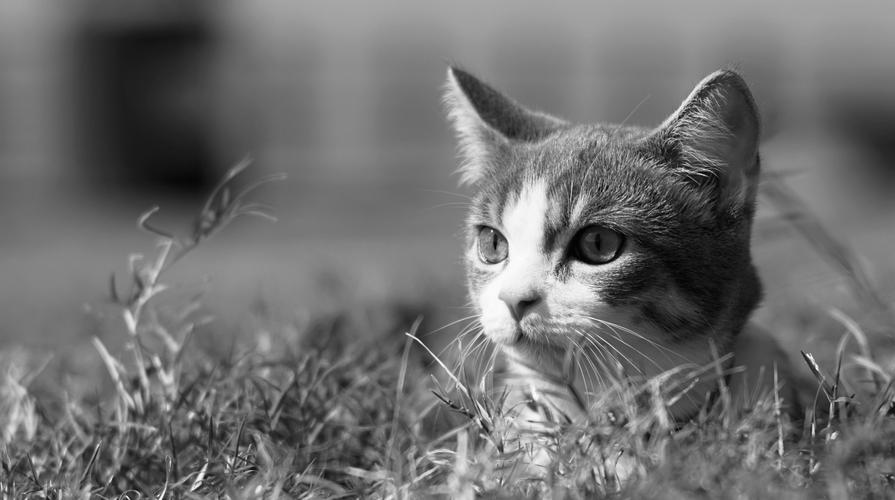

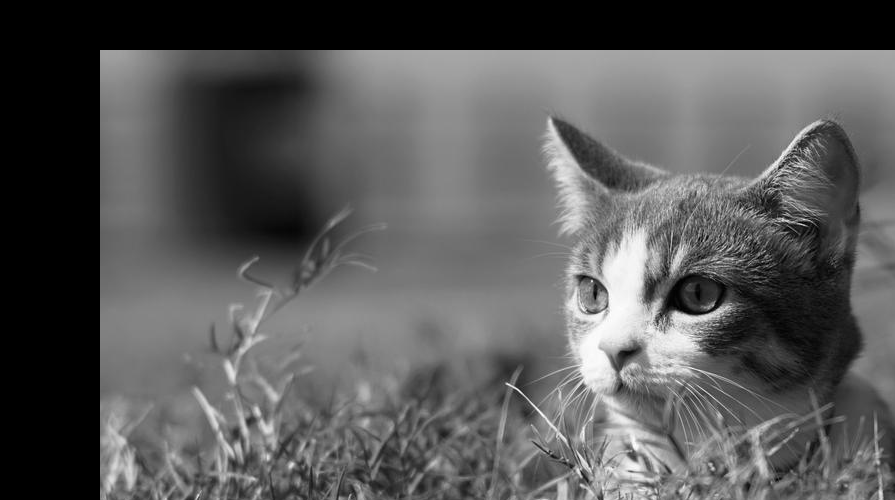

In [16]:
rows, cols = img.shape
M = np.float32([[1, 0, 100], [0, 1, 50]]) # x方向移动100,y方向移动50
dst = cv.warpAffine(img, M, (cols, rows)) # (cols, rows)原始图像的size(width, height)
cv2_imshow(img)
cv2_imshow(dst)

旋转

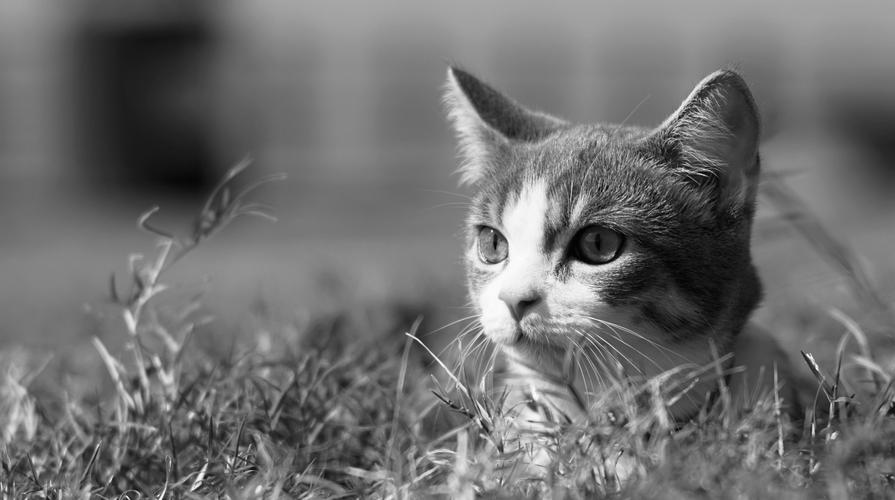

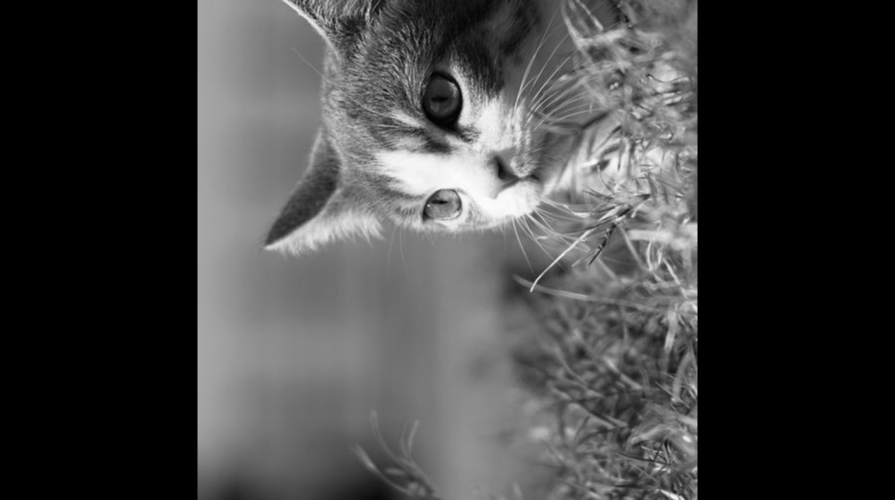

In [17]:
rows, cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
# ((cols-1)/2.0, (rows-1)/2.0)旋转的中心点坐标。90旋转90°,1不缩放
dst = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(img)
cv2_imshow(dst)

Affine Transformation仿射变换

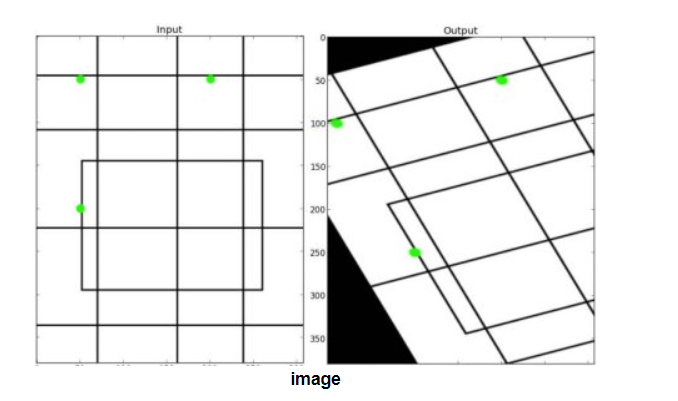

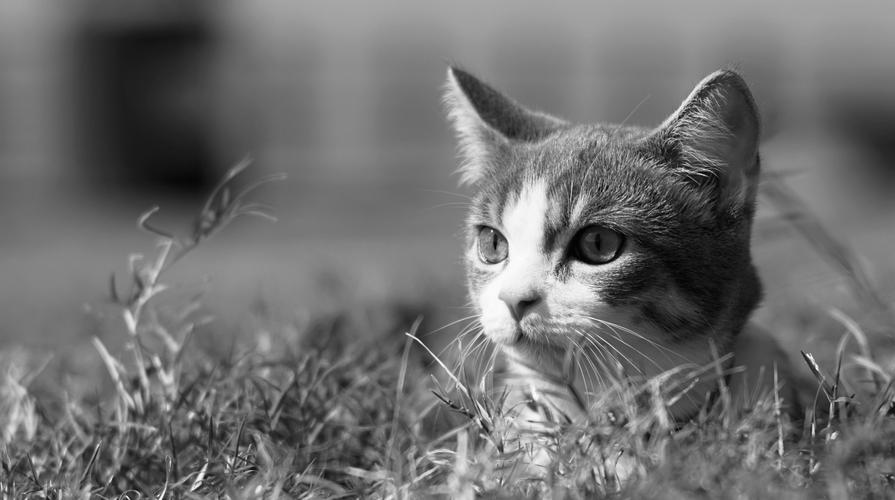

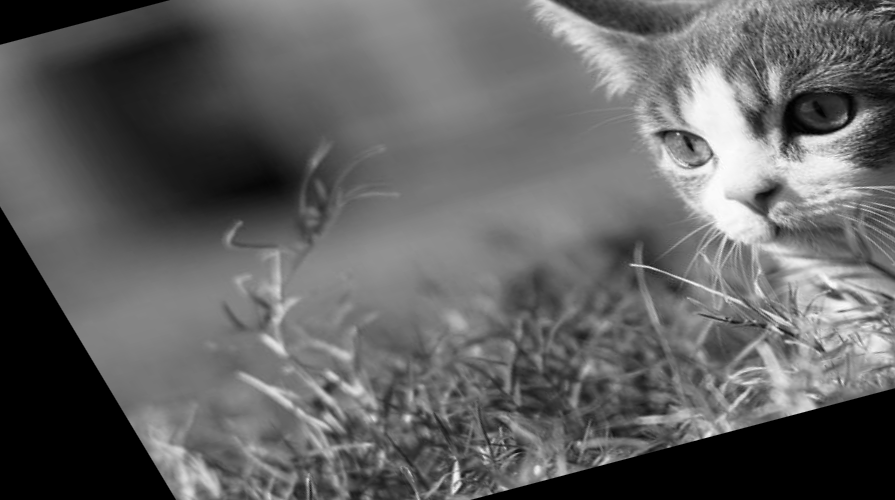

In [19]:
rows, cols = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))
cv2_imshow(img)
cv2_imshow(dst)

Perspective Transformation视角转换

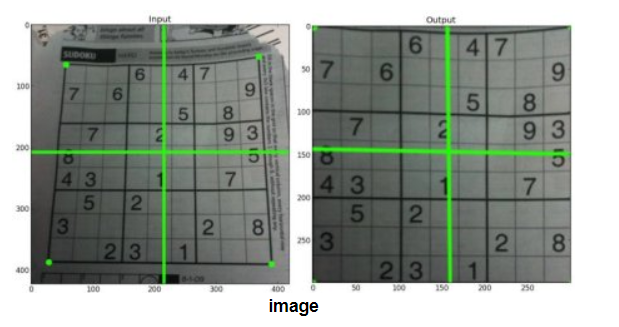

In [ ]:
rows,cols,ch = img.shape # 这个img是彩色图像
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # 原始图像的三个点的位置
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])   # 转换视角后的位置
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))  # (300,300)转换视角后的图像大小